# Fraction of fully phased genes

Shell code
```
zcat Homo_sapiens.GRCh38.95.gtf.gz \
 | awk '$3 = "transcript"' OFS="\t" \
 | cut -f1,4,5,10 \
 | grep -v '^#' \
 | sed 's/"//g' | sed 's/;$//' |  sed 's/^/chr/' \
 | sort -k4,4 \
 | bedtools groupby -g 1,4 -c 2,3 -o min,max \
 | awk -v OFS='\t' '{print $1, $3, $4, $2}' \
 | bedtools sort > GRCh38-genes.bed

ls *.gtf | parallel 'c=$(bedtools subtract -a GRCh38-genes.bed -b {} | cut -f4 | sort -u | wc -l) ;
                              n=$(echo {} | cut -f1 -d'_' | cut -f2 -d'-') ;
                              echo $n $c | tr " " "\t"' | sort -k1,1n > non-contained-gene-counts.txt

```

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dfg = pd.read_csv("non-contained-gene-counts.txt", sep="\t", header=None, names=['readlength', 'non-phased'])
dfg["phased-frac"] = (58735 - dfg["non-phased"]) / 58735

In [3]:
dfp = pd.read_csv("non-contained-prc-gene-counts.txt", sep="\t", header=None, names=['readlength', 'non-phased'])
dfp["phased-frac"] = (19976 - dfp["non-phased"]) / 19976

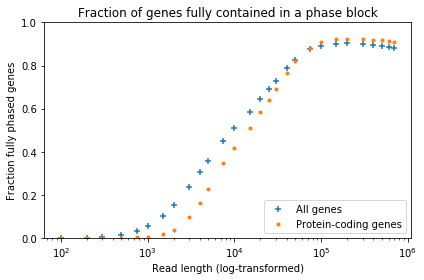

In [4]:
plt.figure()
ax = plt.gca()
ax.scatter(x=dfg["readlength"],
                   y=dfg["phased-frac"],
                   marker='+',
                   label='All genes')
ax.scatter(x=dfp["readlength"],
                   y=dfp["phased-frac"],
                   marker='.',
                   label='Protein-coding genes')
ax.set_xscale('log')
plt.xlabel("Read length (log-transformed)")
plt.ylabel("Fraction fully phased genes")
plt.legend(loc="lower right")
plt.title('Fraction of genes fully contained in a phase block')
plt.ylim(0, 1)
plt.tight_layout()
plt.savefig("Genes_contained_phase_block.png", dpi=500)